# Introduction:
"In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class.[1] It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector."

[wikipedia](https://en.wikipedia.org/wiki/Perceptron)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data:

In [420]:
# Assume 2 features dataset
features = np.array([[1,3], [2,1], [5,4], [6,2], [3,3], [5,8], [1,1], [7,4], [3,2], [3,8], [4,6], [2,3], [6,5]
                    , [5,6], [7,7], [1,4], [2,9], [1,8], [4,2], [1.5,2], [2.5, 3.5], [4.5,1], [2,7]])
labels = np.array([0,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,1])

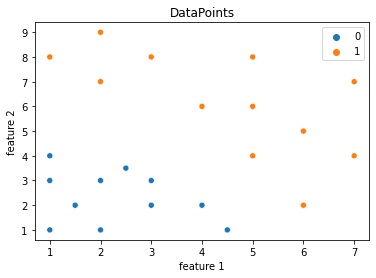

In [421]:
# Visualizing datapints:
feature_1 = [x[0] for x in features]
feature_2 = [x[1] for x in features]
sns.scatterplot(x=feature_1, y=feature_2, hue=labels);
plt.xlabel("feature 1");
plt.ylabel("feature 2");
plt.title("DataPoints");

In [422]:
def step(x):
    if x >=0:
        return 1
    else: 
        return 0
    
# Calculate score of a point
def score(feature, weights, bias):
    return weights.dot(feature) + bias

# model prediction based on one feature datapoint
def prediction(feature, weights, bias):
    return step(score(feature, weights, bias))

# Calculate the error of one data point
def error(feature, label, weights, bias):
    pred = prediction(feature, weights, bias)
    if pred-label == 0:
        return 0
    else:
        return np.abs(score(feature, weights, bias))
    
# calculate mean error for all datapoints
def mean_error(features, labels, weights, bias):
    total_error = 0
    for i in range(len(features)):
        total_error += error(features[i], labels[i], weights, bias)
    return total_error / len(features)


## Training:

In [423]:
# updating model parameters - separating line parameters
def percertron_update(weights, bias, feature, label, learning_rate=0.3):
    # predict the class of the point based on current parameters
    pred = prediction(feature, weights, bias)
    
    # update if only the prediction is incorrect
    weights = weights + ((label-pred) * learning_rate) * feature
    bias = bias + (label-pred) * learning_rate
    
    return weights, bias

In [424]:
np.random.seed(15)
# Learning model Parameters
def perceptron_algorithm(features, labels, iterations):
    # initial weights and bias values
    weights = np.array([1.0 for i in range(len(features[0]))])
    bias = 1
    errors = []
    for i in range(iterations):
        # pick random point
        n = np.random.randint(0, len(features)-1)
        # update the model parameters based on Stochastic Gradient Descent
        weights, bias = percertron_update(weights, bias, features[n], labels[n])
        # calculate mean error for datapoints after the update
        errors.append(mean_error(features, labels, weights, bias))
    return weights, bias, errors

In [425]:
# calling the perceptrom algorithm on our sample data
weights, bias, errors = perceptron_algorithm(features, labels, 500)

In [426]:
# results
print("weights :", weights)
print("bias :", bias)

weights : [1.   0.55]
bias : -5.299999999999998


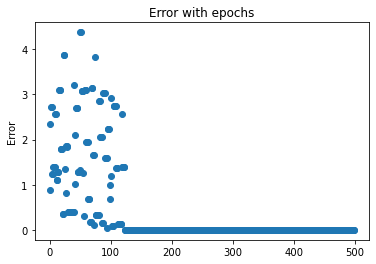

In [427]:
# Plotting the error with epochs
plt.scatter(range(500), errors);
plt.title("Error with epochs");
plt.ylabel('Error');

**Error settles at 0 after about 320 iteration**

## Visualization of results:

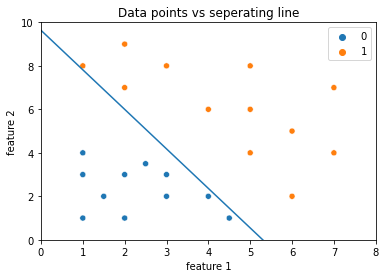

In [428]:
# Visulaization
# Plotting the separating line
x = np.linspace(0,8,100)
y = (weights[0] / -weights[1]) * x + (bias / -weights[1])
plt.plot(x, y);

# plotting the datapoints
sns.scatterplot(x=feature_1, y=feature_2, hue=labels);
plt.xlabel("feature 1");
plt.ylabel("feature 2");
plt.xlim([0,8]);
plt.ylim([0,10]);
plt.title("Data points vs seperating line");

# Perceptron using sklearn:

In [429]:
from sklearn.linear_model import Perceptron

clf = Perceptron()
clf.fit(features, labels)

Perceptron()

In [430]:
clf.score(features, labels)

1.0

In [431]:
# coefficients
weights_sk = clf.coef_[0]
bias_sk = clf.intercept_

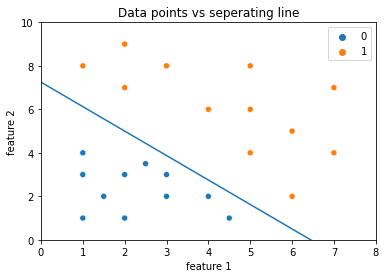

In [432]:
# Visulaization
# Plotting the separating line
x = np.linspace(0,8,100)
y = (weights_sk[0] / -weights_sk[1]) * x + (bias_sk / -weights_sk[1])
plt.plot(x, y);

# plotting the datapoints
sns.scatterplot(x=feature_1, y=feature_2, hue=labels);
plt.xlabel("feature 1");
plt.ylabel("feature 2");
plt.xlim([0,8]);
plt.ylim([0,10]);
plt.title("Data points vs seperating line");